##**Big Data Analytics Assignment**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Necessary Libraries

In [ ]:
# Libraries which are necessary and their importing.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import datetime as dt

# Loading the dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Machine_Learning/NYC_taxi_dataset/train.csv")
# Display first 10 indexes of the dataset
df.head(10)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


# **Feature Engenering**

In [ ]:
# Convert datetime columns to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Extract datetime features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month


Converted the columns `pickup_datetime` and `dropoff_datetime` in the DataFrame df from their current data type (likely string or object) to a proper datetime format. Used `to_datetime()` function that parses the input and converts it to a datetime object.Then, extracted specific components (features) from the `pickup_datetime` column and create new columns for each feature. It derives new columns based on the `pickup_datetime` column to facilitate further analysis or modeling. These features can be used to understand patterns, build predictive models, or visualize trends related to the time and date of pickups.

In [ ]:
from geopy.distance import geodesic

# Calculate trip duration in seconds
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()

# Calculate distance between pickup and dropoff locations
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).kilometers

df['trip_distance'] = df.apply(calculate_distance, axis=1)

# Calculate trip speed (km/h)
df['trip_speed'] = df['trip_distance'] / (df['trip_duration'] / 3600)


Then calculates the trip duration in seconds by finding the difference between `dropoff_datetime` and `pickup_datetime`. It then computes the trip distance in kilometers using the `geodesic` distance between the pickup and dropoff coordinates. Finally, it calculates the trip speed in km/h by dividing the trip distance by the trip duration converted to hours.

In [ ]:
# Encode store_and_fwd_flag
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize trip distance and trip duration
scaler = MinMaxScaler()
df[['trip_distance', 'trip_duration', 'trip_speed']] = scaler.fit_transform(df[['trip_distance', 'trip_duration', 'trip_speed']])


    Here we used the MinMaxScaler from scikit-learn to normalize the trip_distance, trip_duration, and trip_speed columns in the DataFrame df.

# **Model Building**

In [ ]:
# Since, The dataset is having more rows,lets select some portion of it for the Training purpose.
from scipy.stats import zscore
#Train test split
X = df[features].apply(zscore)[:]
y=df['trip_duration_hour'][:]

In [ ]:
# train_test_split imported using sklearn library
from sklearn.model_selection import train_test_split

# data set splitted into 75-25 for training and testing purpose respectively,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# checking Shape of data set splitted into 75-25,
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(906630, 17) (906630,)
(302211, 17) (302211,)


    This above then standardizes the selected features using z-score normalization and splits the dataset into training and testing sets, with 75% for training and 25% for testing. It then imports and uses train_test_split from scikit-learn to create these sets while ensuring reproducibility with random_state=0. Finally, it prints the shapes of the training and testing sets to confirm the split.

## **Linear regression**


    Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting linear equation that predicts the dependent variable based on the independent variables. This is achieved by minimizing the sum of the squared differences between the observed values and the values predicted by the linear equation.

<AxesSubplot:>

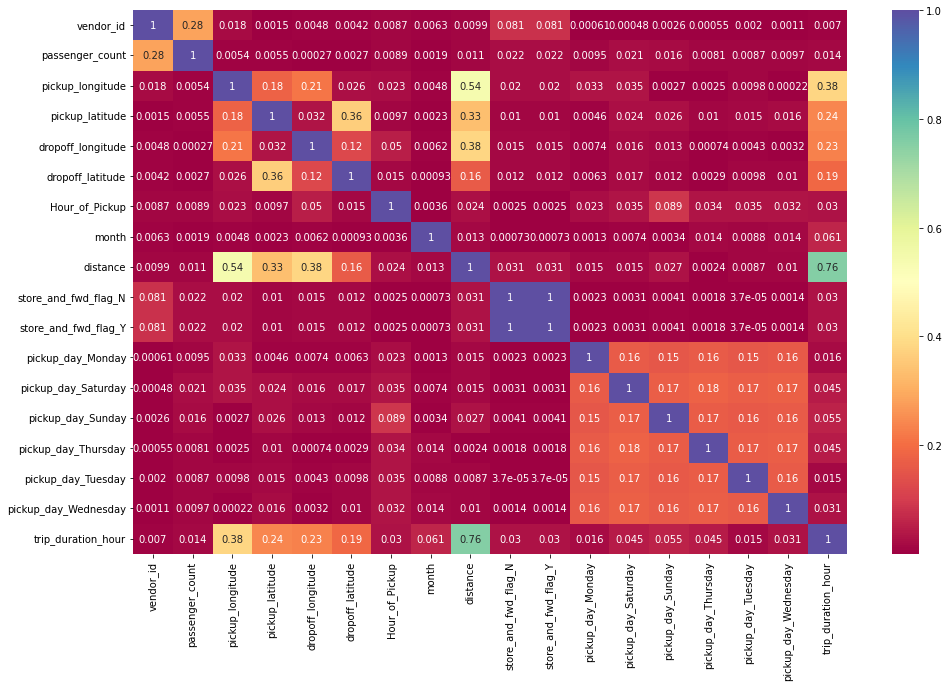

In [ ]:
# Correalation analysis using heatmap
plt.figure (figsize= (16,10))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='Spectral')

In [ ]:
# Fit into linear regression for train and test
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_train, y_train)

0.5961332448415007

In [ ]:
# Training and test pred
y_pred_train = reg.predict(X_train)

y_pred_test = reg.predict(X_test)

## Evaluation and optimization


In [ ]:
# Importing required metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# for train set metric
lr_trn_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_trn_mse)

lr_trn_rmse = np.sqrt(lr_trn_mse)

print("Train RMSE :" ,lr_trn_rmse)

lr_trn_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_trn_r2)

lr_trn_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_trn_r2_)

Train MSE : 0.012777386654874816
Train RMSE : 0.11303710300107137
Train R2 : 0.5961332448415007
Train Adjusted R2 :  0.5961256718832366


In [ ]:
# For test set metrics
lr_tst_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_tst_mse)

lr_tst_rmse = np.sqrt(lr_tst_mse)

print("Test RMSE :" ,lr_tst_rmse)

lr_tst_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_tst_r2)

lr_tst_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_tst_r2_)

Test MSE : 0.012800586716159211
Test RMSE : 0.11313967790372753
Test R2 : 0.5952739636246173
Test Adjusted R2 :  0.5952511955836025


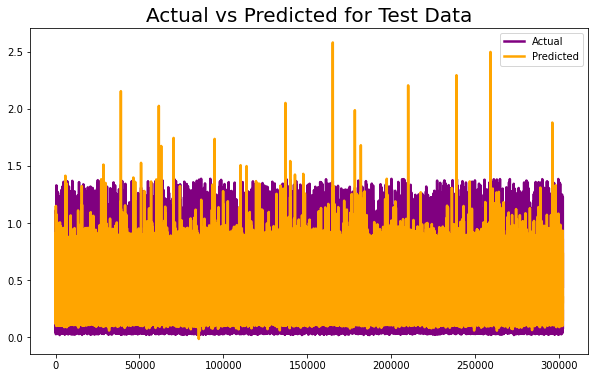

In [ ]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

It has high prediction error on the metrics we tested. Linear regression model does not provide us with high accuracy.



## **Lasso Regression**


    Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that includes a regularization term to prevent overfitting. This regularization term penalizes the absolute value of the coefficients, effectively shrinking some of them to zero. This process not only helps in reducing model complexity and enhancing prediction accuracy but also performs variable selection by excluding irrelevant features. Lasso regression is particularly useful when dealing with datasets that have a large number of features, as it can produce sparse models with fewer non-zero coefficients.

In [ ]:
# Importing required models
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.085e+01, tolerance: 2.300e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# Best fit Alpha value
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}
The R2 score using the same alpha is : 0.5960767666982185


In [ ]:
lasso_regressor.score(X_train, y_train)


0.5961333472111617

In [ ]:
# Making prediction
y_pred_lasso_train = lasso_regressor.predict(X_train)

y_pred_lasso_test = lasso_regressor.predict(X_test)

## Evaluation and Optimization of model

In [ ]:
# Traning metrics
lasso_trn_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_trn_mse)

lasso_trn_rmse = np.sqrt(lasso_trn_mse)
print("Train RMSE :" ,lasso_trn_rmse)

lasso_trn_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_trn_r2)

lasso_trn_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_trn_r2)

Train MSE : 0.012777383416141435
Train RMSE : 0.11303708867509564
Train R2 : 0.5961333472111617
Train Adjusted R2 :  0.5961333472111617


In [ ]:
# Testing metrics
lasso_tst_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_tst_mse)

lasso_tst_rmse = np.sqrt(lasso_tst_mse)
print("Test RMSE :" ,lasso_tst_rmse)

lasso_tst_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_tst_r2)

lasso_tst_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_tst_r2_)

Test MSE : 0.012800607849454193
Test RMSE : 0.11313977129839972
Test R2 : 0.5952732954369081
Test Adjusted R2 :  0.5952505273583042


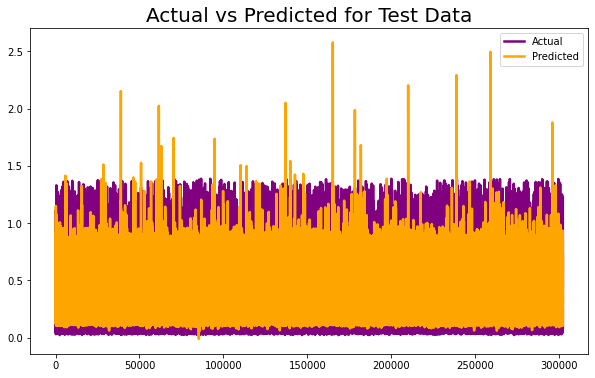

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

As per observation, Lasso regresion model doesn't improve on the Linear model either.



## **Decision Tree Regressor**


    Decision Tree Regressor is a non-linear machine learning algorithm used for regression tasks, where the goal is to predict a continuous target variable. It works by recursively splitting the data into subsets based on the value of input features, creating a tree-like structure where each leaf node represents a predicted value. The algorithm selects splits that minimize the mean squared error (or another specified criterion) at each node. Decision Tree Regressors are easy to interpret and can capture complex relationships in the data but can be prone to overfitting if not properly pruned.

In [ ]:
# importing decision tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]

# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#the cache variables contains the best parameters for the Decision Tree to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

In [ ]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = cache,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   6.8s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.7212740058036056

In [ ]:
dt_grid.best_estimator_


DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)

## Prediction Task

In [ ]:
# Making prediction
y_pred_dt_train=dt_grid.predict(X_train)

y_pred_dt_test=dt_grid.predict(X_test)

In [ ]:
# training metrics
dt_trn_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_trn_mse)

dt_trn_rmse = np.sqrt(dt_trn_mse)
print("Train RMSE :" ,dt_trn_rmse)

dt_trn_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_trn_r2)

dt_trn_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_trn_r2_)

Train MSE : 0.008662683574221236
Train RMSE : 0.09307353852852719
Train R2 : 0.726190495710577
Train Adjusted R2 :  0.7261853614728073


In [ ]:
# Testing metrics
dt_tst_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_tst_mse)
dt_tst_rmse = np.sqrt(dt_tst_mse)
print("Test RMSE :" ,dt_tst_rmse)

dt_tst_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_tst_r2)

dt_tst_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_tst_r2_)

Test MSE : 0.008855467343187717
Test RMSE : 0.09410349272576293
Test R2 : 0.7200098497410603
Test Adjusted R2 :  0.7199940987721285


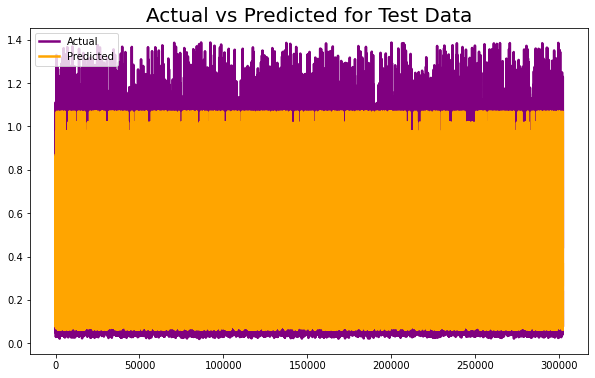

In [ ]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

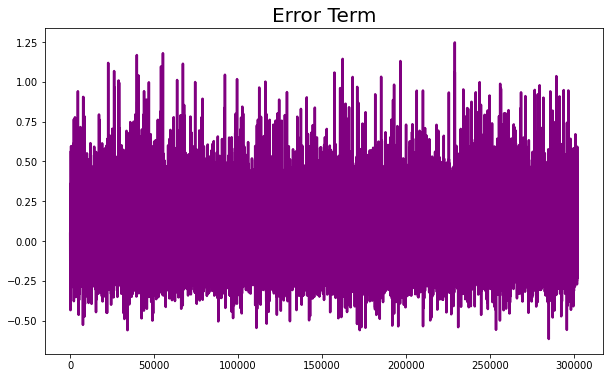

In [ ]:
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='purple', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

The decision tree improved the predictions much better than Linear models.

